In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("C:\\Users\\karan\\Downloads\\heart_attack_predictions.csv")

# Head

In [3]:
df.head()

,Country,Age,Gender,Cholesterol_Level,Blood_Pressure,Smoking_History,Alcohol_Consumption,Physical_Activity,Obesity,Diabetes,...,LDL_Cholesterol,Triglycerides,Heart_Disease_Risk,Medication_Adherence,Urbanization_Level,Air_Pollution_Exposure,Access_To_Healthcare,Education_Level,Income_Level,Heart_Attack_Outcome
0,Germany,39,Male,210.091036,173.301650,Never,0.531933,Active,No,No,...,68.333573,165.060897,Medium,No,Urban,51.988416,Good,Tertiary,Low,Died
1,Egypt,88,Male,163.998730,137.381678,Former,5.626668,Sedentary,Yes,Yes,...,98.194015,452.124651,Medium,No,Suburban,97.739896,Good,NaN,Low,Died
2,Spain,60,Female,263.502590,139.737677,Former,0.928015,Active,No,Yes,...,118.767677,171.432620,Low,No,Urban,60.352793,Poor,Tertiary,Low,Survived
3,Canada,25,Female,292.003927,85.992807,Former,7.374519,Active,No,Yes,...,190.190597,329.553258,Medium,No,Urban,14.397347,Good,Secondary,High,Survived
4,France,54,Female,267.736563,119.882856,Former,4.317845,Sedentary,Yes,No,...,188.209372,449.953074,High,Yes,Rural,69.448684,Good,NaN,Low,Died


# Changing col names to lowercase

In [4]:
df.columns = df.columns.str.lower()

# Info

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623027 entries, 0 to 623026
Data columns (total 30 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   country                  623027 non-null  object 
 1   age                      623027 non-null  int64  
 2   gender                   623027 non-null  object 
 3   cholesterol_level        623027 non-null  float64
 4   blood_pressure           623027 non-null  float64
 5   smoking_history          623027 non-null  object 
 6   alcohol_consumption      623027 non-null  float64
 7   physical_activity        623027 non-null  object 
 8   obesity                  623027 non-null  object 
 9   diabetes                 623027 non-null  object 
 10  family_history           623027 non-null  object 
 11  stress_levels            623027 non-null  float64
 12  dietary_habits           623027 non-null  object 
 13  heart_attack_history     623027 non-null  object 
 14  ches

# Describe

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,623027.0,53.506029,20.791615,18.000000,35.000000,53.000000,72.000000,89.000000
cholesterol_level,623027.0,224.923182,43.272619,150.000057,187.551255,224.835733,262.426382,299.999907
blood_pressure,623027.0,130.008723,28.875588,80.000100,105.007014,130.036666,154.982690,179.999789
alcohol_consumption,623027.0,5.000483,2.888441,0.000014,2.501110,5.001672,7.497314,9.999990
stress_levels,623027.0,5.506905,2.598430,1.000014,3.257009,5.511778,7.758713,9.999970
max_heart_rate_achieved,623027.0,129.487062,40.424069,60.000000,94.000000,129.000000,164.000000,199.000000
hdl_cholesterol,623027.0,60.031668,23.112245,20.000071,39.990083,60.055936,80.027313,99.999982
ldl_cholesterol,623027.0,125.043638,43.280826,50.000057,87.571144,125.047625,162.531874,199.999924
triglycerides,623027.0,274.857978,129.925033,50.001096,162.201635,275.026028,387.265494,499.999209
air_pollution_exposure,623027.0,54.974987,25.942410,10.000151,32.547015,54.946690,77.419095,99.999881


# Checking for null and duplicated values

In [8]:
np.sum(df.isna(), axis = 0)

country                         0
age                             0
gender                          0
cholesterol_level               0
blood_pressure                  0
smoking_history                 0
alcohol_consumption             0
physical_activity               0
obesity                         0
diabetes                        0
family_history                  0
stress_levels                   0
dietary_habits                  0
heart_attack_history            0
chest_pain                      0
exercise_induced_angina         0
resting_ecg                     0
max_heart_rate_achieved         0
thalassemia                     0
hdl_cholesterol                 0
ldl_cholesterol                 0
triglycerides                   0
heart_disease_risk              0
medication_adherence            0
urbanization_level              0
air_pollution_exposure          0
access_to_healthcare            0
education_level            155697
income_level                    0
heart_attack_o

In [50]:
df = df.fillna({"education_level" : "No data"})

np.sum(df.isna(), axis = 0)

country                    0
age                        0
gender                     0
cholesterol_level          0
blood_pressure             0
smoking_history            0
alcohol_consumption        0
physical_activity          0
obesity                    0
diabetes                   0
family_history             0
stress_levels              0
dietary_habits             0
heart_attack_history       0
chest_pain                 0
exercise_induced_angina    0
resting_ecg                0
max_heart_rate_achieved    0
thalassemia                0
hdl_cholesterol            0
ldl_cholesterol            0
triglycerides              0
heart_disease_risk         0
medication_adherence       0
urbanization_level         0
air_pollution_exposure     0
access_to_healthcare       0
education_level            0
income_level               0
heart_attack_outcome       0
dtype: int64

In [51]:
np.sum(df.duplicated(), axis = 0)

0

# Getting unique values for dif cols

In [52]:
obj_col = df.select_dtypes('object').columns
print(obj_col)

Index(['country', 'gender', 'smoking_history', 'physical_activity', 'obesity',
       'diabetes', 'family_history', 'dietary_habits', 'heart_attack_history',
       'chest_pain', 'exercise_induced_angina', 'resting_ecg', 'thalassemia',
       'heart_disease_risk', 'medication_adherence', 'urbanization_level',
       'access_to_healthcare', 'education_level', 'income_level',
       'heart_attack_outcome'],
      dtype='object')


In [53]:
for col in obj_col:
    print(f"\nUnique value counts for columns : {col}:")
    print(df[col].unique())
    print(df[col].value_counts())


Unique value counts for columns : country:
['Germany' 'Egypt' 'Spain' 'Canada' 'France' 'Pakistan' 'Nigeria'
 'Vietnam' 'Philippines' 'Brazil' 'China' 'Bangladesh' 'India'
 'South Africa' 'United Kingdom' 'United States' 'South Korea' 'Turkey'
 'Australia' 'Indonesia' 'Russia' 'Japan' 'Saudi Arabia' 'Italy' 'Mexico']
country
Indonesia         25285
Nigeria           25173
Spain             25158
Mexico            25124
Russia            25099
India             25099
Bangladesh        25045
Vietnam           25041
Turkey            25001
Brazil            24994
France            24989
Pakistan          24957
United States     24907
Japan             24893
Australia         24866
United Kingdom    24851
Germany           24806
Egypt             24775
China             24771
South Africa      24754
Philippines       24735
Saudi Arabia      24705
Italy             24697
South Korea       24669
Canada            24633
Name: count, dtype: int64

Unique value counts for columns : gender:
['M

# Histogram of all numeric col Distribution


In [54]:
numeric_col = df.select_dtypes("number").columns
print(numeric_col)

Index(['age', 'cholesterol_level', 'blood_pressure', 'alcohol_consumption',
       'stress_levels', 'max_heart_rate_achieved', 'hdl_cholesterol',
       'ldl_cholesterol', 'triglycerides', 'air_pollution_exposure'],
      dtype='object')


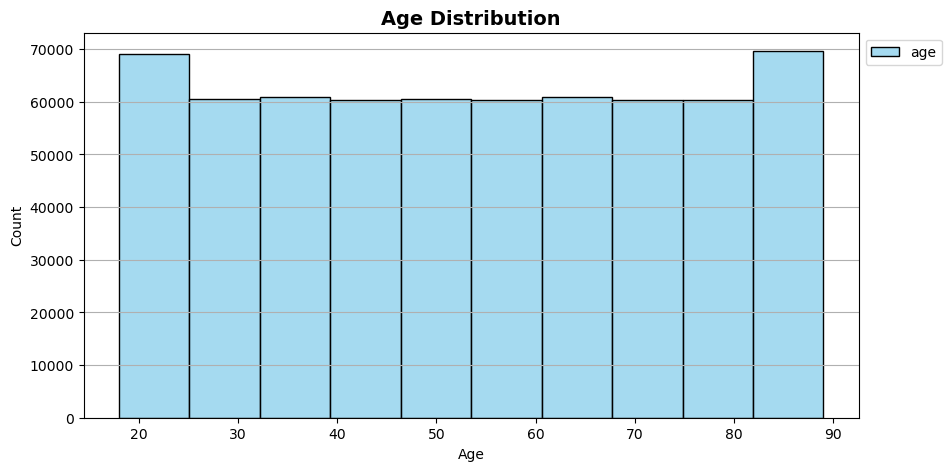

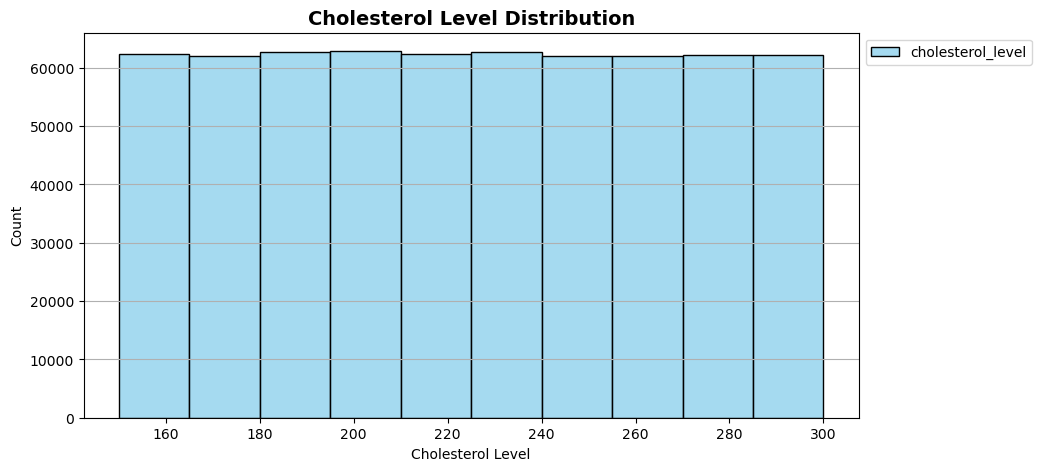

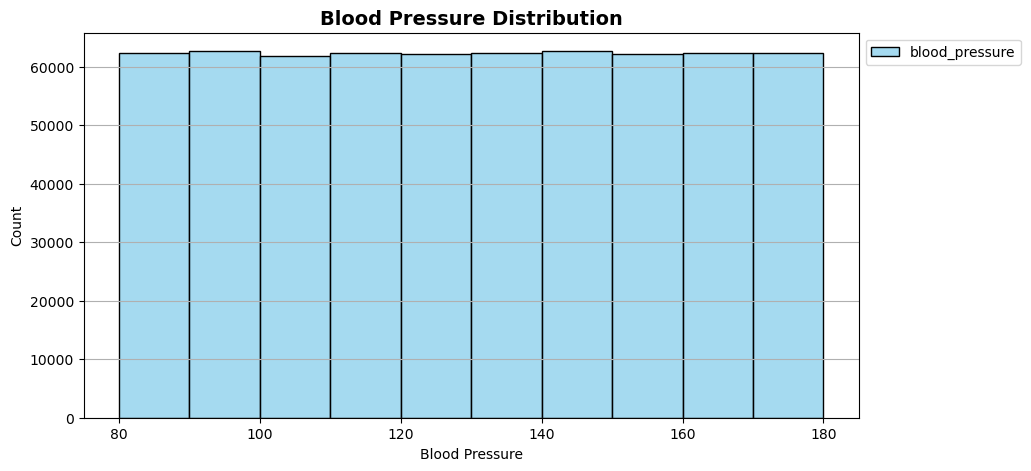

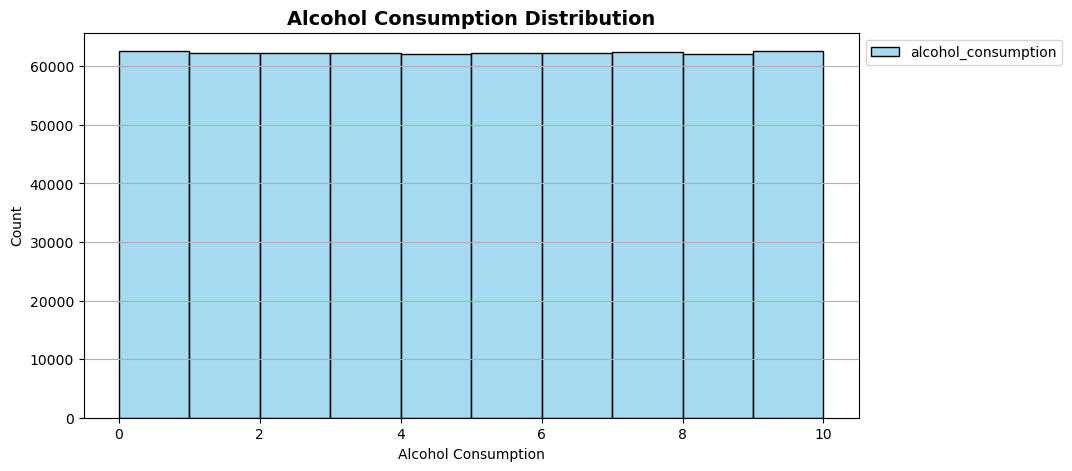

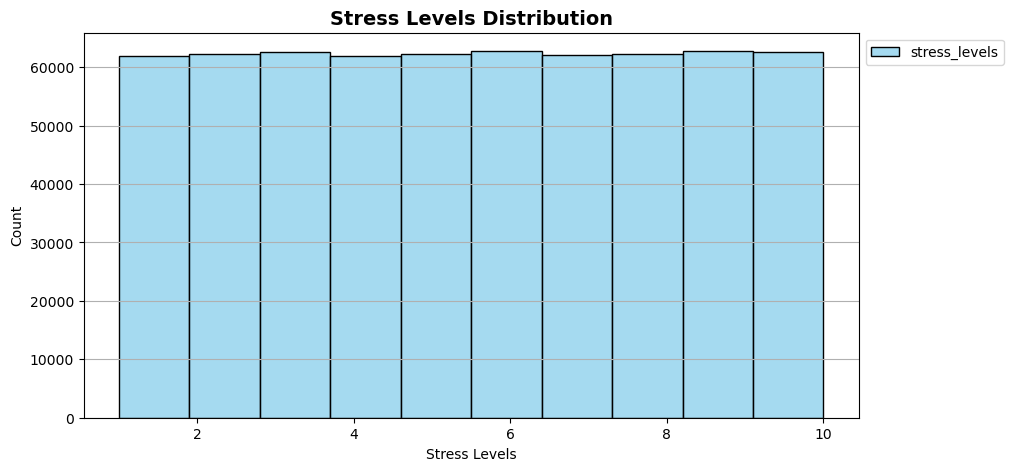

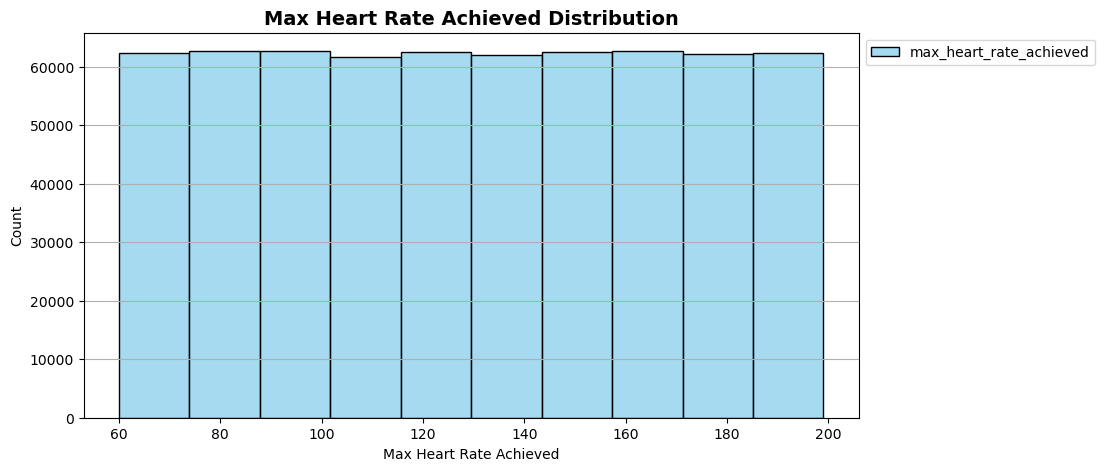

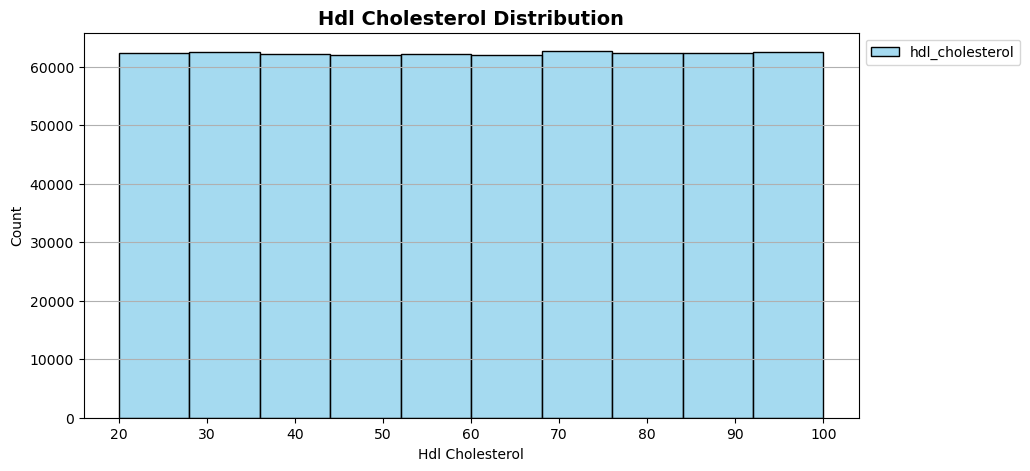

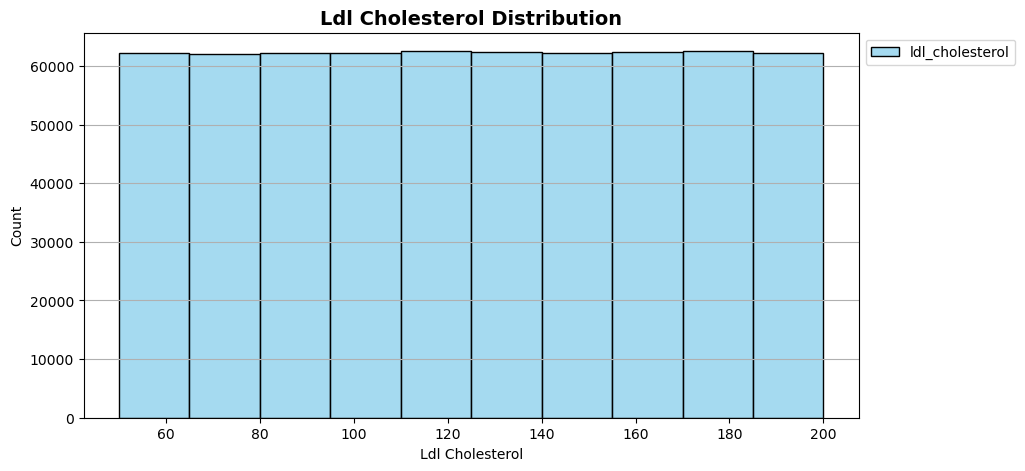

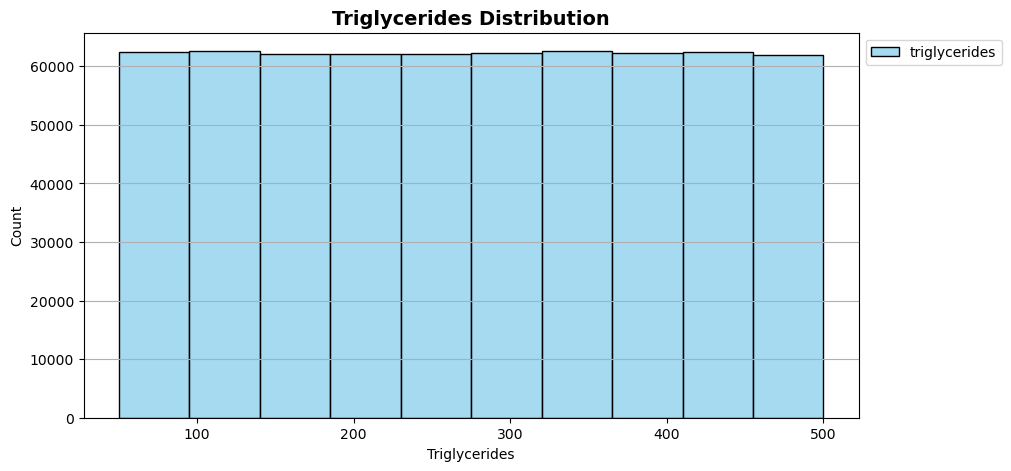

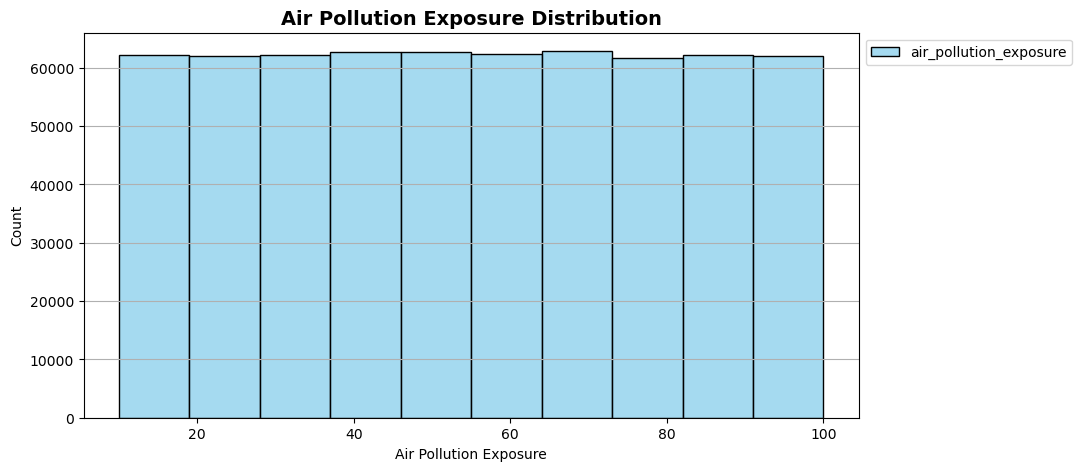

In [85]:
for col in numeric_col:
    plt.figure(figsize = (10, 5))
    sns.histplot(x = col, data = df, color = 'skyblue', bins = 10, label = col)
    plt.title(f"{col.title().replace('_', ' ')} Distribution", fontsize = 14, fontweight = 'bold')
    plt.xlabel(col.title().replace('_', ' '))
    plt.ylabel("Count")
    plt.legend(bbox_to_anchor = (1, 1))
    plt.grid(axis = 'y')
    plt.show()


# Box plot of all numeric cols

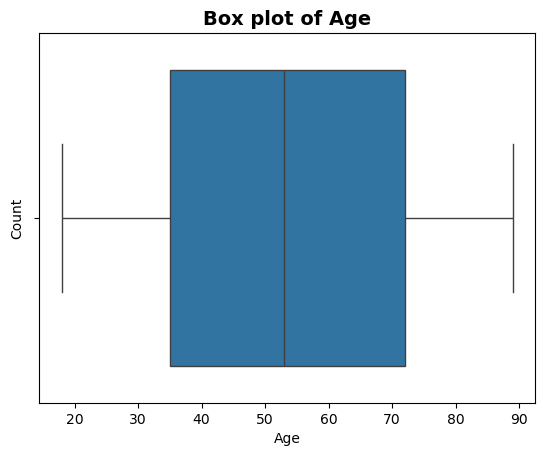

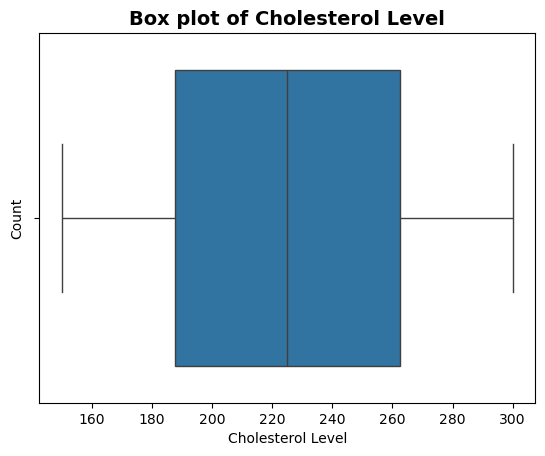

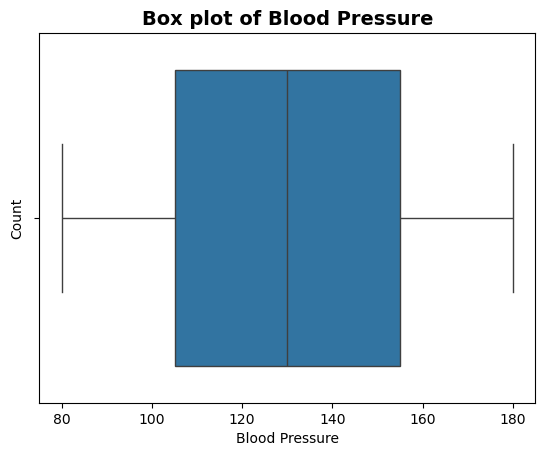

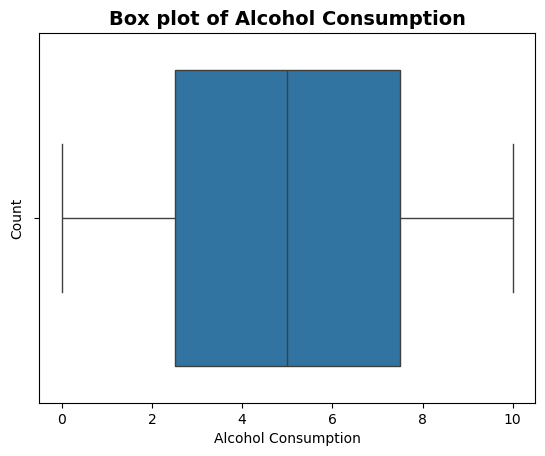

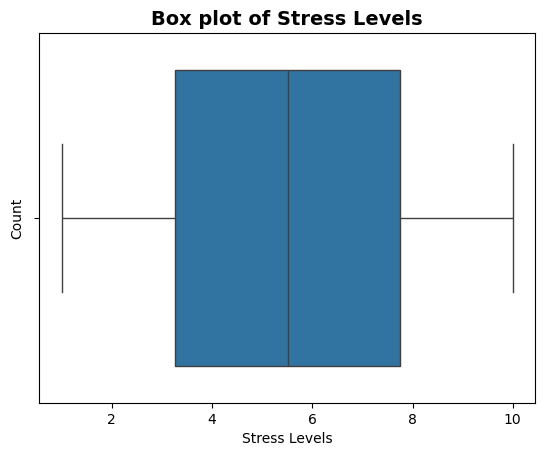

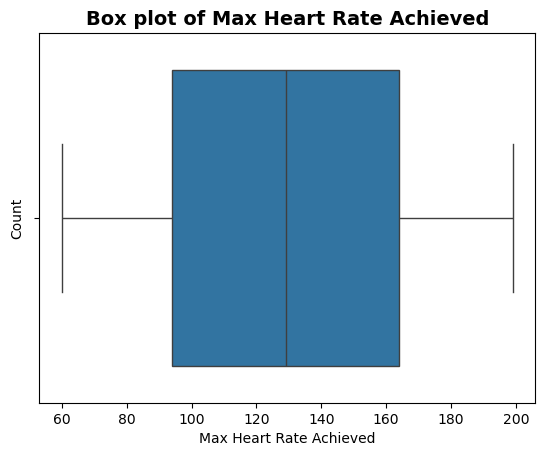

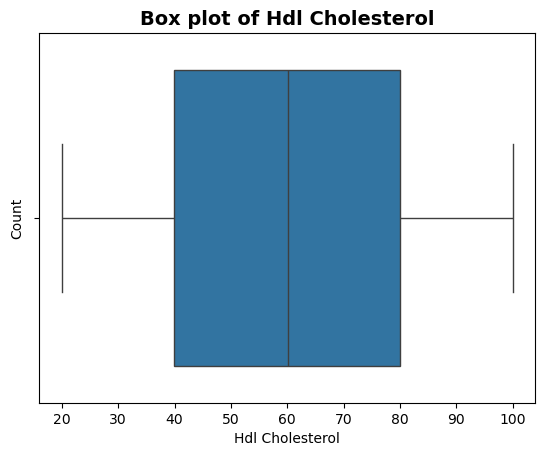

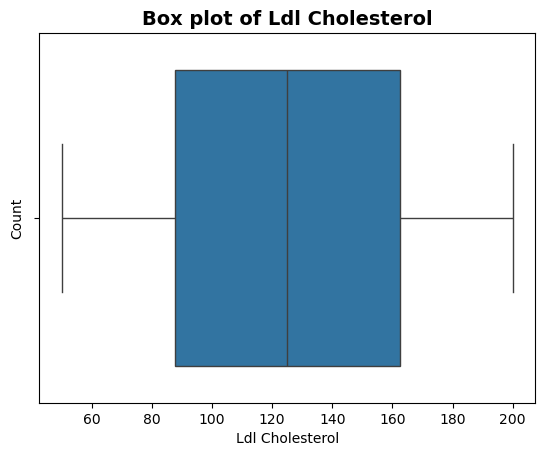

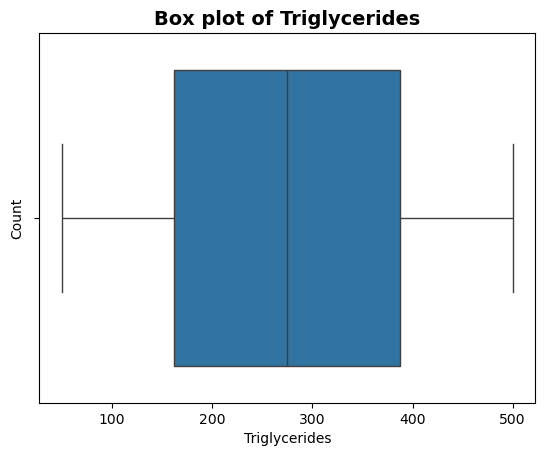

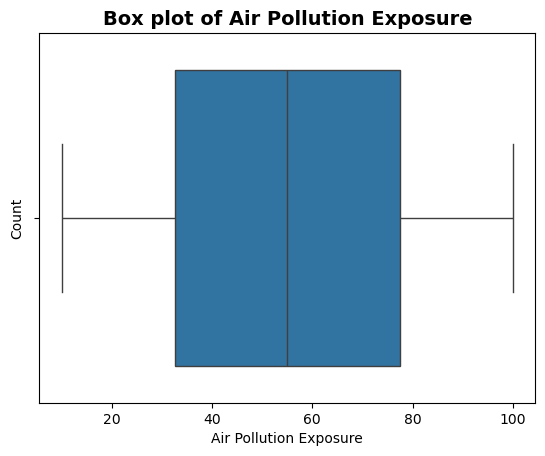

In [56]:
for col in numeric_col:
    sns.boxplot(x = col, data = df)
    plt.title(f"Box plot of {col.title().replace('_', ' ')}", fontsize = 14, fontweight = 'bold')
    plt.xlabel(col.title().replace('_', ' '))
    plt.ylabel("Count")
    plt.show()

# Grouping by gender to draw insights

In [57]:
df_gender = df.groupby('gender').agg({'gender' : 'count', **{col : 'mean' for col in numeric_col}})
df_gender.rename(inplace = True, columns = {'gender' : 'gender_count'})
df_gender = df_gender.reset_index()
df_gender.index = np.arange(1, 3)

In [58]:
df_gender.T

,1,2
gender,Female,Male
gender_count,311574,311453
age,53.526292,53.485759
cholesterol_level,224.929989,224.916372
blood_pressure,130.074179,129.943242
alcohol_consumption,4.997806,5.00316
stress_levels,5.50863,5.505179
max_heart_rate_achieved,129.447415,129.526725
hdl_cholesterol,60.048389,60.014941
ldl_cholesterol,125.10747,124.979781


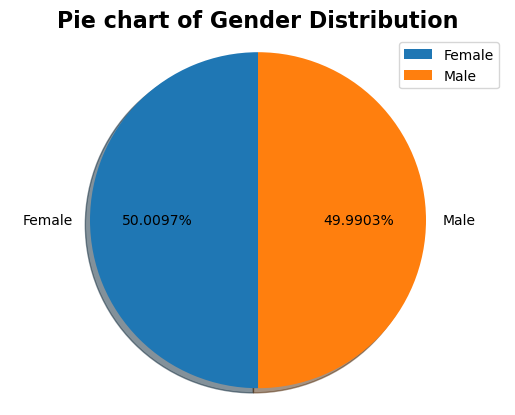

In [59]:
plt.pie(df_gender['gender_count'], labels = ['Female', "Male"], autopct = '%1.4f%%',
        shadow = True, startangle = 90)
plt.title("Pie chart of Gender Distribution", fontsize = 16, fontweight = 'bold')
plt.legend(bbox_to_anchor = (1, 1))
plt.axis('equal')
plt.show()

# Grouping by country to draw insights

In [60]:
df_con = df.groupby("country").agg({'country' : 'size', **{col : 'mean' for col in numeric_col}})
df_con.rename(columns = {'country' : 'country_count'}, inplace = True)
df_con = df_con.reset_index()
df_con.index = np.arange(1, len(df_con) + 1)

In [61]:
df_con.T

,1,2,3,4,5,6,7,8,9,10,...,16,17,18,19,20,21,22,23,24,25
country,Australia,Bangladesh,Brazil,Canada,China,Egypt,France,Germany,India,Indonesia,...,Philippines,Russia,Saudi Arabia,South Africa,South Korea,Spain,Turkey,United Kingdom,United States,Vietnam
country_count,24866,25045,24994,24633,24771,24775,24989,24806,25099,25285,...,24735,25099,24705,24754,24669,25158,25001,24851,24907,25041
age,53.525778,53.696426,53.54109,53.533796,53.561544,53.480807,53.616671,53.562122,53.535838,53.444691,...,53.55092,53.520937,53.451083,53.479842,53.413515,53.539153,53.566377,53.59563,53.789939,53.334971
cholesterol_level,224.579276,225.212001,225.188012,225.243556,224.843545,225.008031,224.580711,224.888028,224.66082,224.947562,...,224.803706,224.781074,224.903138,225.059636,224.588412,225.132842,224.532528,225.237762,225.179782,224.470921
blood_pressure,130.061959,129.777731,129.932805,129.793018,130.17242,130.076413,130.109938,130.190865,129.684504,130.470292,...,129.871206,130.020202,129.915971,130.073124,130.17328,130.146005,129.553214,129.997104,130.113131,129.943244
alcohol_consumption,5.036688,5.014173,5.002413,4.983997,5.013608,4.991823,5.00655,5.001717,5.00481,4.99401,...,4.989886,5.002561,4.998733,4.991956,4.976627,5.005041,4.992948,4.98504,4.98729,4.993182
stress_levels,5.487401,5.500845,5.491818,5.516619,5.498438,5.504599,5.515022,5.52706,5.532171,5.511509,...,5.532358,5.49719,5.521841,5.506745,5.510571,5.486099,5.512338,5.507721,5.498265,5.49337
max_heart_rate_achieved,129.568286,129.602156,129.211211,129.87054,129.483226,129.119354,129.219457,129.373216,129.150763,129.513348,...,129.465656,129.724371,129.780409,129.921952,129.86558,129.506956,129.602696,129.619331,129.558959,129.400783
hdl_cholesterol,59.916809,59.912373,60.120272,60.074569,59.982736,60.206594,60.245586,59.919403,60.099833,60.185256,...,60.275003,59.783258,59.986133,59.925771,59.862572,60.004033,59.935451,60.183151,60.045468,59.919285
ldl_cholesterol,125.13345,125.003163,125.115078,125.341153,124.808768,124.816467,124.748007,124.716571,125.489013,125.276081,...,125.011059,125.132352,125.299659,124.656194,125.186674,125.170886,124.988076,124.68034,124.563006,125.26552


Getting top 10 countries with most counts

In [62]:
con10 = df_con.nlargest(10, 'country_count')
con10.index = np.arange(1, 11)

In [63]:
con10.T

,1,2,3,4,5,6,7,8,9,10
country,Indonesia,Nigeria,Spain,Mexico,India,Russia,Bangladesh,Vietnam,Turkey,Brazil
country_count,25285,25173,25158,25124,25099,25099,25045,25041,25001,24994
age,53.444691,53.405712,53.539153,53.525115,53.535838,53.520937,53.696426,53.334971,53.566377,53.54109
cholesterol_level,224.947562,224.485732,225.132842,225.150934,224.66082,224.781074,225.212001,224.470921,224.532528,225.188012
blood_pressure,130.470292,129.792048,130.146005,130.100885,129.684504,130.020202,129.777731,129.943244,129.553214,129.932805
alcohol_consumption,4.99401,5.011244,5.005041,5.013843,5.00481,5.002561,5.014173,4.993182,4.992948,5.002413
stress_levels,5.511509,5.487228,5.486099,5.514567,5.532171,5.49719,5.500845,5.49337,5.512338,5.491818
max_heart_rate_achieved,129.513348,129.691654,129.506956,129.156703,129.150763,129.724371,129.602156,129.400783,129.602696,129.211211
hdl_cholesterol,60.185256,60.174289,60.004033,59.886691,60.099833,59.783258,59.912373,59.919285,59.935451,60.120272
ldl_cholesterol,125.276081,125.323808,125.170886,125.043858,125.489013,125.132352,125.003163,125.26552,124.988076,125.115078


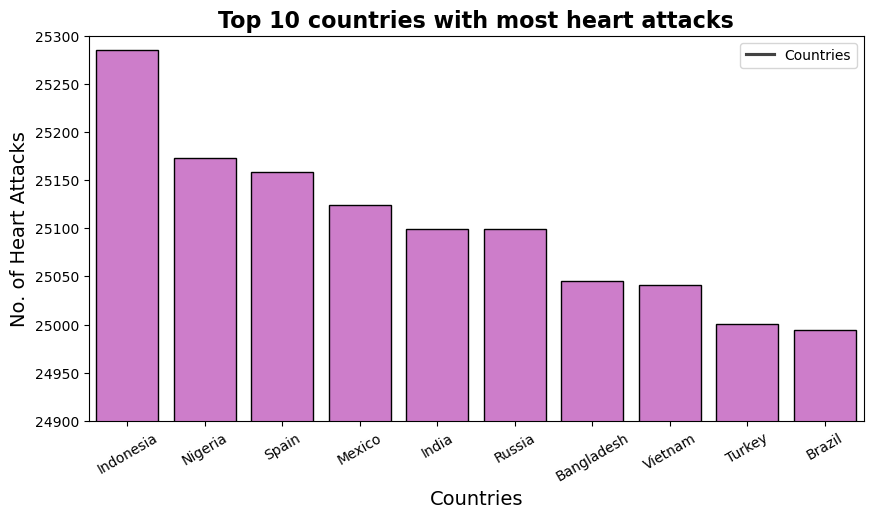

In [64]:
plt.figure(figsize = (10, 5))
sns.barplot(x = 'country', y = 'country_count', data = con10, color = 'orchid', edgecolor = 'black')
plt.title("Top 10 countries with most heart attacks", fontsize = 16, fontweight = 'bold')
plt.xlabel("Countries", fontsize = 14)
plt.ylabel("No. of Heart Attacks", fontsize = 14)
plt.xticks(rotation = 30)
plt.legend(["Countries"], bbox_to_anchor = (1,1))
plt.ylim(24900, 25300)
plt.show()

Getting top 10 countries with most cholesterol levels

In [65]:
con10 = df_con.nlargest(10, 'cholesterol_level')
con10.index = np.arange(1, 11)

In [66]:
con10.T

,1,2,3,4,5,6,7,8,9,10
country,Japan,Canada,United Kingdom,Bangladesh,Brazil,United States,Pakistan,Mexico,Spain,South Africa
country_count,24893,24633,24851,25045,24994,24907,24957,25124,25158,24754
age,53.292371,53.533796,53.59563,53.696426,53.54109,53.789939,53.271227,53.525115,53.539153,53.479842
cholesterol_level,225.44029,225.243556,225.237762,225.212001,225.188012,225.179782,225.165119,225.150934,225.132842,225.059636
blood_pressure,130.125867,129.793018,129.997104,129.777731,129.932805,130.113131,129.962882,130.100885,130.146005,130.073124
alcohol_consumption,4.984394,4.983997,4.98504,5.014173,5.002413,4.98729,5.011806,5.013843,5.005041,4.991956
stress_levels,5.498115,5.516619,5.507721,5.500845,5.491818,5.498265,5.485818,5.514567,5.486099,5.506745
max_heart_rate_achieved,129.428514,129.87054,129.619331,129.602156,129.211211,129.558959,129.249669,129.156703,129.506956,129.921952
hdl_cholesterol,59.909075,60.074569,60.183151,59.912373,60.120272,60.045468,60.052297,59.886691,60.004033,59.925771
ldl_cholesterol,125.082678,125.341153,124.68034,125.003163,125.115078,124.563006,125.138868,125.043858,125.170886,124.656194


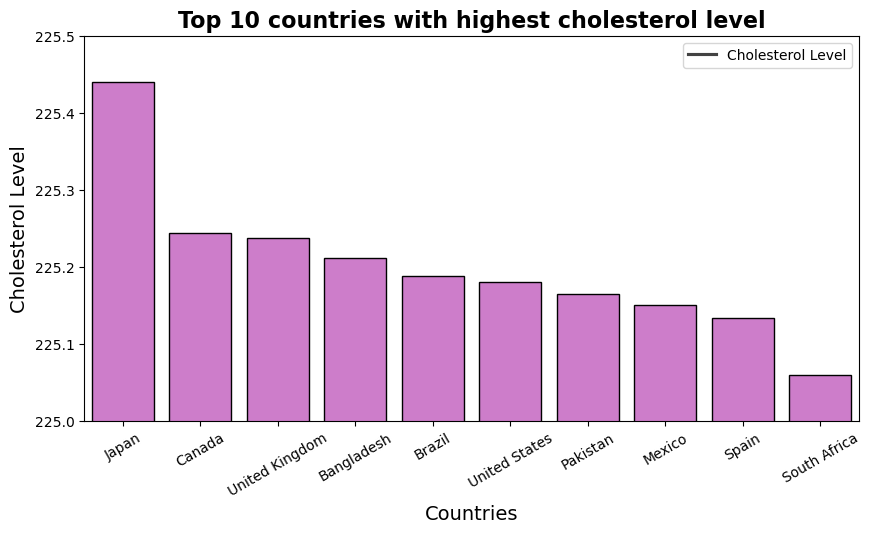

In [67]:
plt.figure(figsize = (10, 5))
sns.barplot(x = 'country', y = 'cholesterol_level', data = con10, color = 'orchid', edgecolor = 'black')
plt.title("Top 10 countries with highest cholesterol level", fontsize = 16, fontweight = 'bold')
plt.xlabel("Countries", fontsize = 14)
plt.ylabel("Cholesterol Level", fontsize = 14)
plt.xticks(rotation = 30)
plt.legend(["Cholesterol Level"], bbox_to_anchor = (1,1))
plt.ylim(225.0000, 225.5000)
plt.show()

Top 10 countries with highest air pollution exposure

In [68]:
con10 = df_con.nlargest(10, 'air_pollution_exposure')
con10.index = np.arange(1, 11)

In [69]:
con10.T

,1,2,3,4,5,6,7,8,9,10
country,South Korea,Indonesia,United Kingdom,Egypt,United States,Saudi Arabia,Mexico,Germany,India,Spain
country_count,24669,25285,24851,24775,24907,24705,25124,24806,25099,25158
age,53.413515,53.444691,53.59563,53.480807,53.789939,53.451083,53.525115,53.562122,53.535838,53.539153
cholesterol_level,224.588412,224.947562,225.237762,225.008031,225.179782,224.903138,225.150934,224.888028,224.66082,225.132842
blood_pressure,130.17328,130.470292,129.997104,130.076413,130.113131,129.915971,130.100885,130.190865,129.684504,130.146005
alcohol_consumption,4.976627,4.99401,4.98504,4.991823,4.98729,4.998733,5.013843,5.001717,5.00481,5.005041
stress_levels,5.510571,5.511509,5.507721,5.504599,5.498265,5.521841,5.514567,5.52706,5.532171,5.486099
max_heart_rate_achieved,129.86558,129.513348,129.619331,129.119354,129.558959,129.780409,129.156703,129.373216,129.150763,129.506956
hdl_cholesterol,59.862572,60.185256,60.183151,60.206594,60.045468,59.986133,59.886691,59.919403,60.099833,60.004033
ldl_cholesterol,125.186674,125.276081,124.68034,124.816467,124.563006,125.299659,125.043858,124.716571,125.489013,125.170886


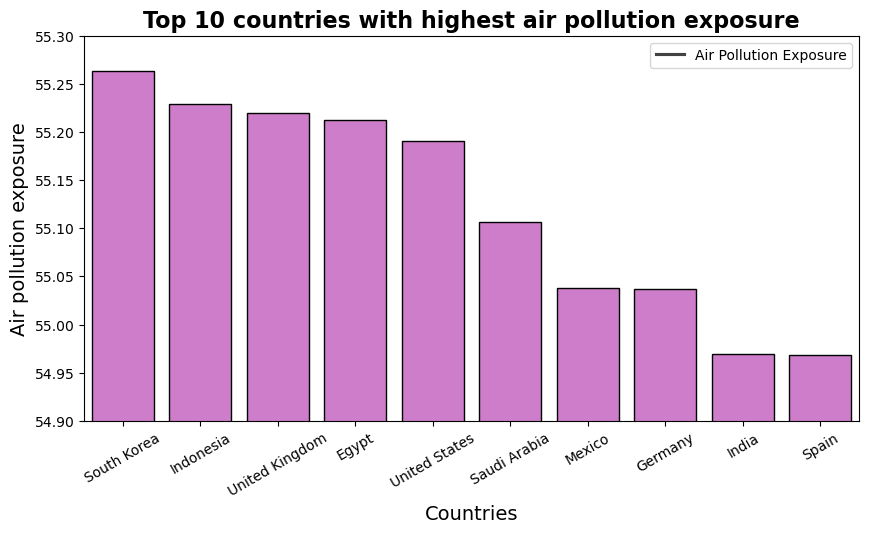

In [70]:
plt.figure(figsize = (10, 5))
sns.barplot(x = 'country', y = 'air_pollution_exposure', data = con10, color = 'orchid', edgecolor = 'black')
plt.title("Top 10 countries with highest air pollution exposure", fontsize = 16, fontweight = 'bold')
plt.xlabel("Countries", fontsize = 14)
plt.ylabel("Air pollution exposure", fontsize = 14)
plt.xticks(rotation = 30)
plt.legend(["Air Pollution Exposure"], bbox_to_anchor = (1,1))
plt.ylim(54.900, 55.3)
plt.show()

In [71]:
con10 = df_con.nlargest(10, 'alcohol_consumption')
con10.index = np.arange(1, 11)

In [72]:
con10.T

,1,2,3,4,5,6,7,8,9,10
country,Australia,Italy,Bangladesh,Mexico,China,Pakistan,Nigeria,France,Spain,India
country_count,24866,24697,25045,25124,24771,24957,25173,24989,25158,25099
age,53.525778,53.414828,53.696426,53.525115,53.561544,53.271227,53.405712,53.616671,53.539153,53.535838
cholesterol_level,224.579276,225.002614,225.212001,225.150934,224.843545,225.165119,224.485732,224.580711,225.132842,224.66082
blood_pressure,130.061959,130.160169,129.777731,130.100885,130.17242,129.962882,129.792048,130.109938,130.146005,129.684504
alcohol_consumption,5.036688,5.017072,5.014173,5.013843,5.013608,5.011806,5.011244,5.00655,5.005041,5.00481
stress_levels,5.487401,5.535907,5.500845,5.514567,5.498438,5.485818,5.487228,5.515022,5.486099,5.532171
max_heart_rate_achieved,129.568286,129.101794,129.602156,129.156703,129.483226,129.249669,129.691654,129.219457,129.506956,129.150763
hdl_cholesterol,59.916809,60.186552,59.912373,59.886691,59.982736,60.052297,60.174289,60.245586,60.004033,60.099833
ldl_cholesterol,125.13345,125.088094,125.003163,125.043858,124.808768,125.138868,125.323808,124.748007,125.170886,125.489013


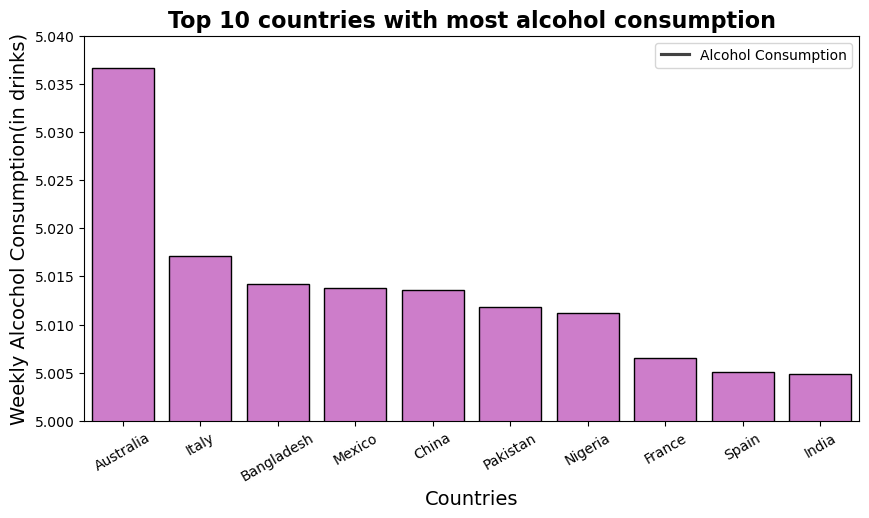

In [73]:
plt.figure(figsize = (10, 5))
sns.barplot(x = 'country', y = 'alcohol_consumption', data = con10, color = 'orchid', edgecolor = 'black')
plt.title("Top 10 countries with most alcohol consumption", fontsize = 16, fontweight = 'bold')
plt.xlabel("Countries", fontsize = 14)
plt.ylabel("Weekly Alcochol Consumption(in drinks)", fontsize = 14)
plt.xticks(rotation = 30)
plt.legend(["Alcohol Consumption"], bbox_to_anchor = (1,1))
plt.ylim(5, 5.04)
plt.show()

In [74]:
obj_col

Index(['country', 'gender', 'smoking_history', 'physical_activity', 'obesity',
       'diabetes', 'family_history', 'dietary_habits', 'heart_attack_history',
       'chest_pain', 'exercise_induced_angina', 'resting_ecg', 'thalassemia',
       'heart_disease_risk', 'medication_adherence', 'urbanization_level',
       'access_to_healthcare', 'education_level', 'income_level',
       'heart_attack_outcome'],
      dtype='object')

In [75]:
col_sn= [col for col in obj_col if set(df[col].unique()) <= {'Yes', 'No'}]
col_sn.remove('family_history')
col_sn

['obesity',
 'diabetes',
 'heart_attack_history',
 'chest_pain',
 'exercise_induced_angina',
 'medication_adherence']


Top 10 countries with most Obesity
       country obesity  count
1       Mexico     Yes  12630
2       Turkey     Yes  12616
3      Nigeria     Yes  12601
4   Bangladesh     Yes  12571
5       France     Yes  12566
6        Spain     Yes  12557
7       Brazil     Yes  12527
8    Indonesia     Yes  12526
9        Japan     Yes  12501
10      Russia     Yes  12494


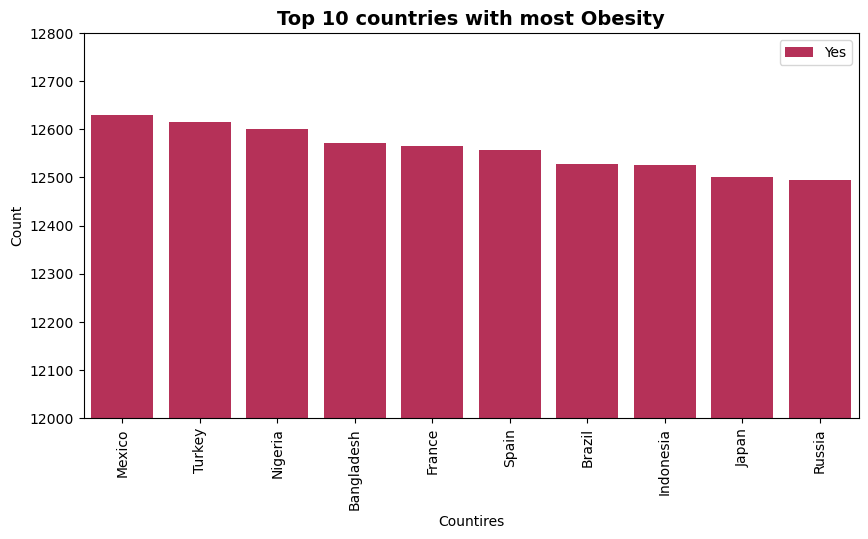


Top 10 countries with most Diabetes
          country diabetes  count
1       Indonesia      Yes  12709
2   United States      Yes  12640
3      Bangladesh      Yes  12611
4          Turkey      Yes  12601
5          Mexico      Yes  12585
6           Spain      Yes  12572
7           India      Yes  12559
8         Nigeria      Yes  12543
9          Brazil      Yes  12537
10    Philippines      Yes  12527


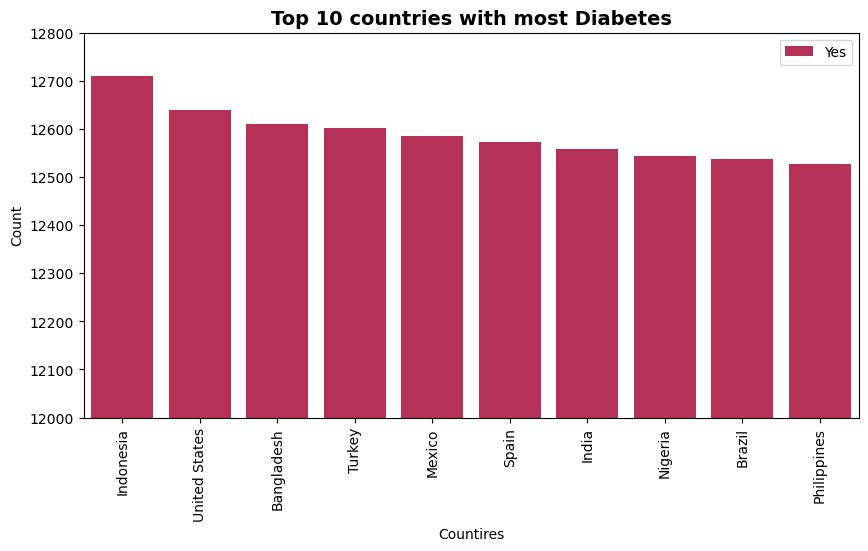


Top 10 countries with most Heart Attack History
           country heart_attack_history  count
1        Indonesia                  Yes  12766
2            Spain                  Yes  12599
3   United Kingdom                  Yes  12591
4          Nigeria                  Yes  12585
5           Mexico                  Yes  12582
6      Philippines                  Yes  12570
7           Russia                  Yes  12552
8           Brazil                  Yes  12545
9          Germany                  Yes  12532
10       Australia                  Yes  12503


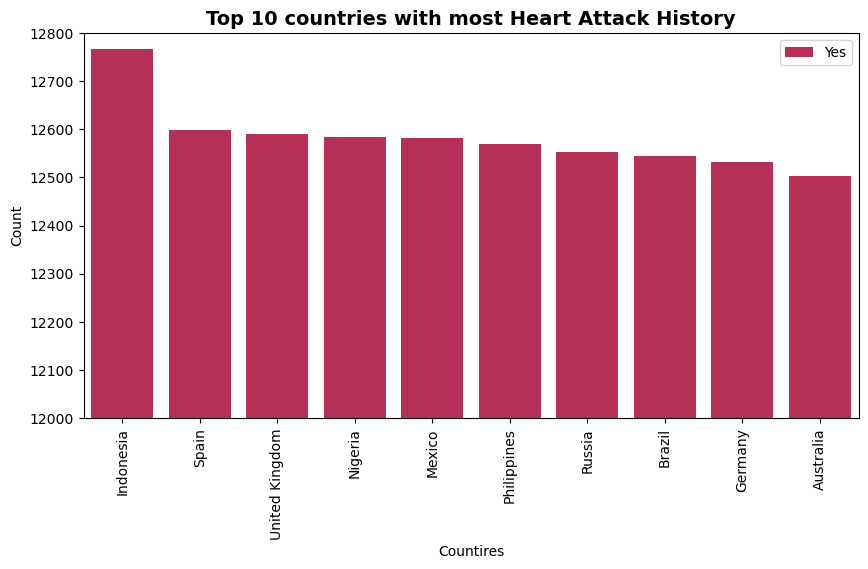


Top 10 countries with most Chest Pain
           country chest_pain  count
1          Vietnam        Yes  12652
2        Indonesia        Yes  12642
3         Pakistan        Yes  12638
4           Turkey        Yes  12587
5            Spain        Yes  12534
6            India        Yes  12533
7          Nigeria        Yes  12529
8          Germany        Yes  12513
9           Mexico        Yes  12512
10  United Kingdom        Yes  12507


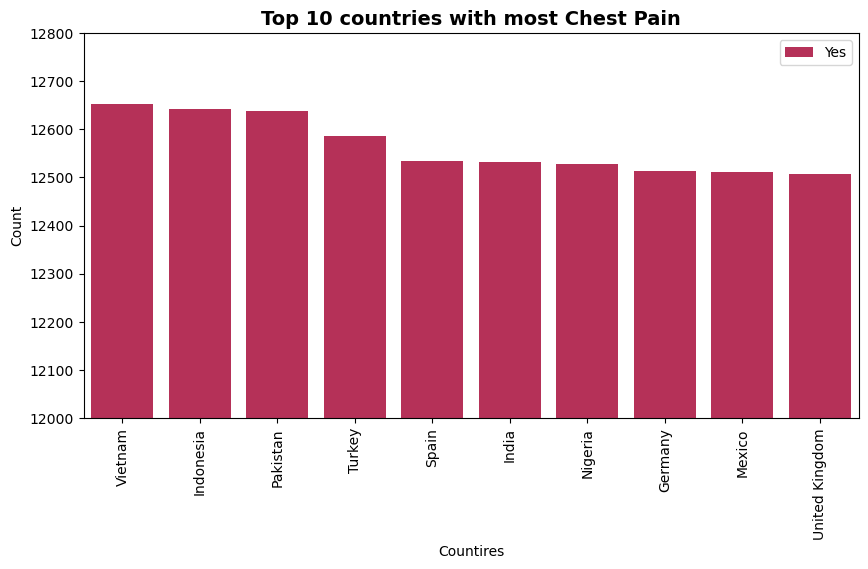


Top 10 countries with most Exercise Induced Angina
          country exercise_induced_angina  count
1          Mexico                     Yes  12634
2          Russia                     Yes  12627
3       Indonesia                     Yes  12603
4           India                     Yes  12602
5         Vietnam                     Yes  12589
6           Spain                     Yes  12544
7         Nigeria                     Yes  12526
8       Australia                     Yes  12504
9   United States                     Yes  12484
10         Brazil                     Yes  12479


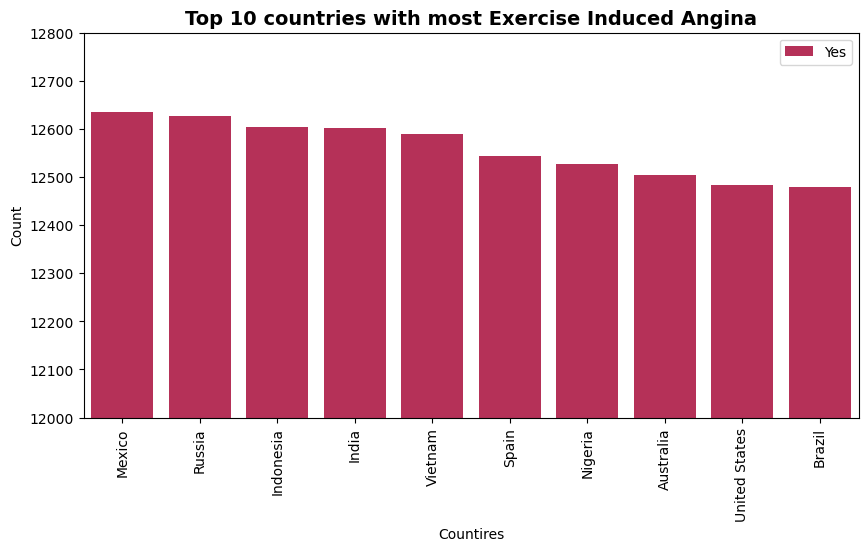


Top 10 countries with most Medication Adherence
           country medication_adherence  count
1            India                  Yes  12647
2        Indonesia                  Yes  12638
3          Vietnam                  Yes  12596
4            Japan                  Yes  12559
5            Spain                  Yes  12559
6          Nigeria                  Yes  12546
7           Mexico                  Yes  12541
8            Italy                  Yes  12475
9            China                  Yes  12467
10  United Kingdom                  Yes  12465


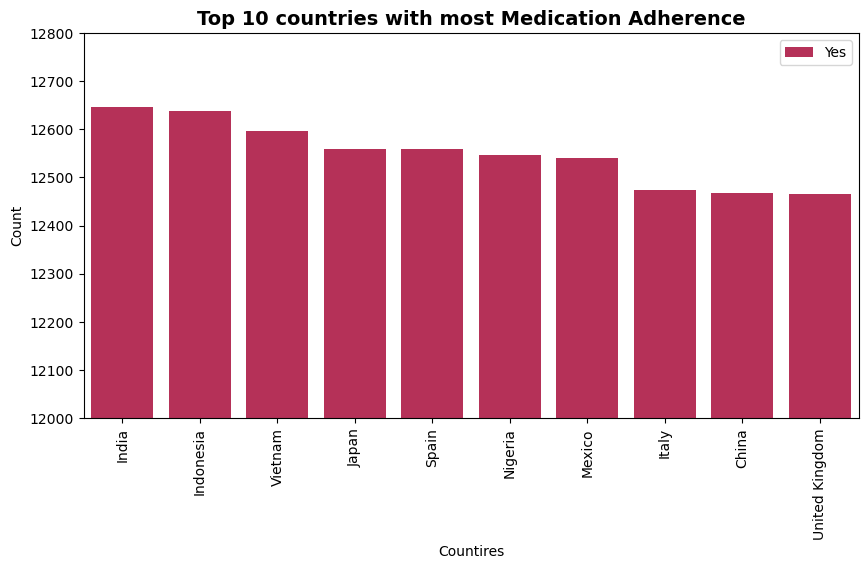

In [76]:
for col in col_sn:
    dfcon = df.groupby(['country', col]).size().reset_index(name = 'count')
    dfcon = dfcon.query(f'{col} == "Yes"')
    dfcon10 = dfcon.nlargest(10, 'count')
    dfcon10.index = np.arange(1, 11)
    print(f"\nTop 10 countries with most {col.title().replace('_', ' ')}")
    print(dfcon10)
    
    plt.figure(figsize = (10, 5))
    sns.barplot(x = 'country', y = 'count', hue = col, data = dfcon10, palette = 'rocket')
    plt.title(f"Top 10 countries with most {col.title().replace('_', ' ')}", fontsize = 14, fontweight = 'bold')
    plt.xlabel("Countires")
    plt.ylabel("Count")
    plt.xticks(rotation = 90)
    plt.ylim(12000, 12800)
    plt.legend(bbox_to_anchor = (1, 1))
    plt.show()


# Getting top 10 countries with most heart attack deaths

In [77]:
df_dead = df.groupby(['country', 'heart_attack_outcome']).size().reset_index(name = 'count')
df_topdead = df_dead.query('heart_attack_outcome == "Died"')
df_top10dead = df_topdead.nlargest(10, 'count')
df_top10dead.index = np.arange(1, 11)
df_top10dead

,country,heart_attack_outcome,count
1,Russia,Died,12734
2,Indonesia,Died,12610
3,South Africa,Died,12597
4,France,Died,12565
5,Spain,Died,12563
6,United Kingdom,Died,12538
7,Bangladesh,Died,12532
8,Pakistan,Died,12530
9,Vietnam,Died,12527
10,India,Died,12523


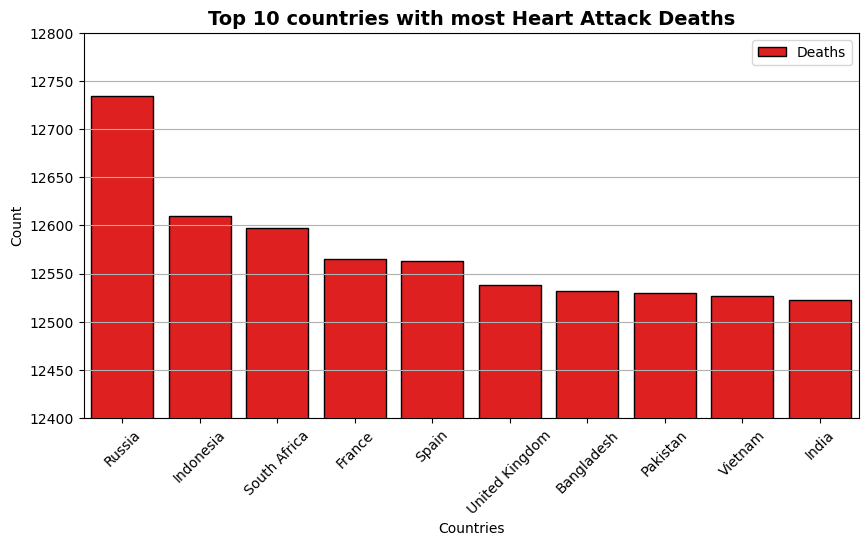

In [78]:
plt.figure(figsize = (10, 5))
sns.barplot(x = 'country', y = 'count', data = df_top10dead, label = 'Deaths', color = 'red', edgecolor = 'black')
plt.title("Top 10 countries with most Heart Attack Deaths", fontsize = 14, fontweight = 'bold')
plt.xlabel("Countries")
plt.ylabel("Count")
plt.legend(bbox_to_anchor = (1, 1))
plt.grid(axis = 'y')
plt.ylim(12400, 12800)
plt.xticks(rotation = 45)
plt.show()

# Distribution of heart attack outcome, heart disease risk, access to healthcare, income, urbanization, education level in dif countries

In [79]:
cols = ['heart_attack_outcome', 'heart_disease_risk', 'access_to_healthcare',
        'income_level', 'education_level', 'urbanization_level']

for col in cols:
    df_level = df.groupby(['country', col]).size().reset_index(name = 'count')
    print('\n', col)
    print(f"Min : {np.min(df_level['count'])} | Max : {np.max(df_level['count'])}")


 heart_attack_outcome
Min : 12157 | Max : 12734

 heart_disease_risk
Min : 8117 | Max : 8543

 access_to_healthcare
Min : 8048 | Max : 8528

 income_level
Min : 8126 | Max : 8486

 education_level
Min : 6032 | Max : 6430

 urbanization_level
Min : 8132 | Max : 8579


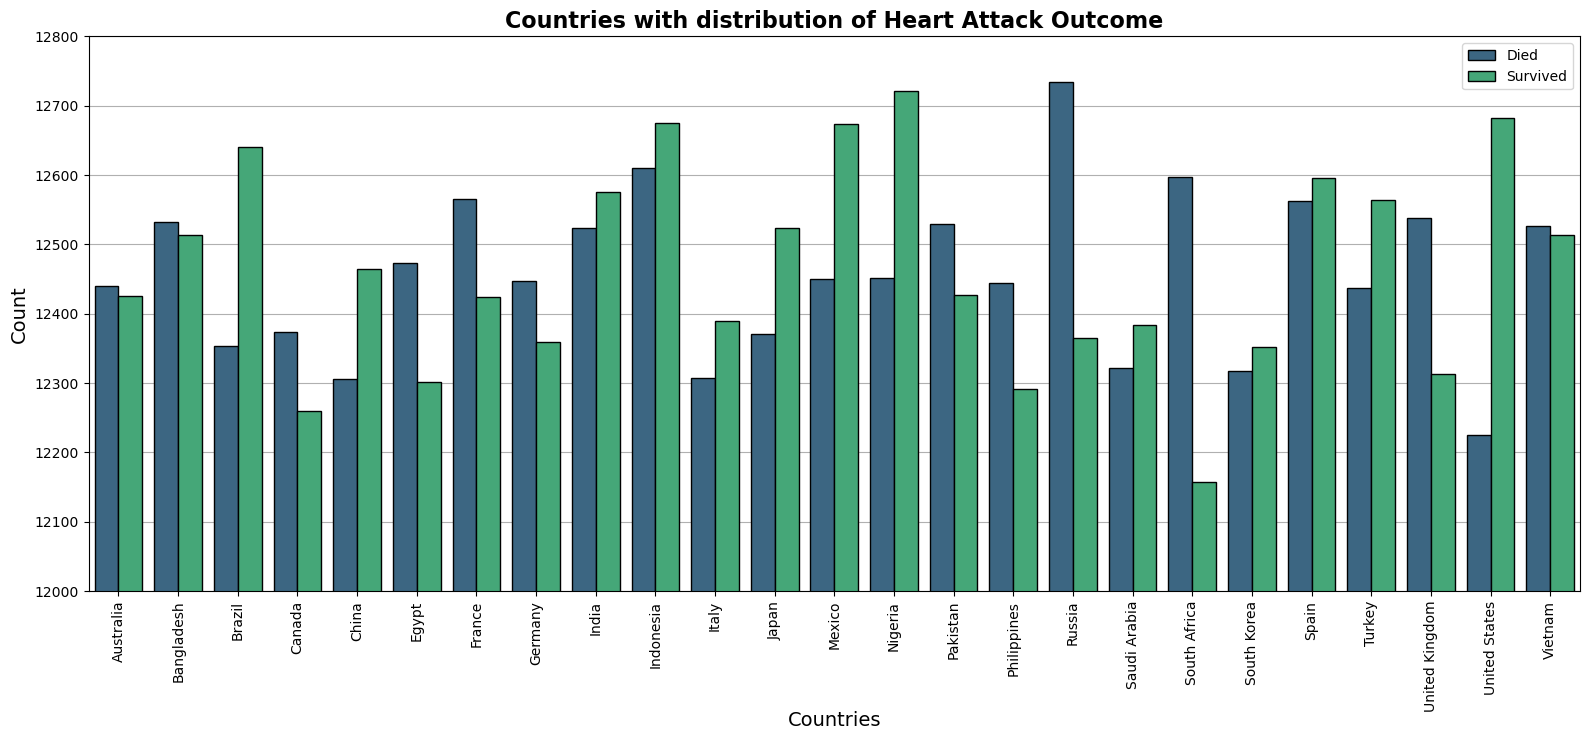

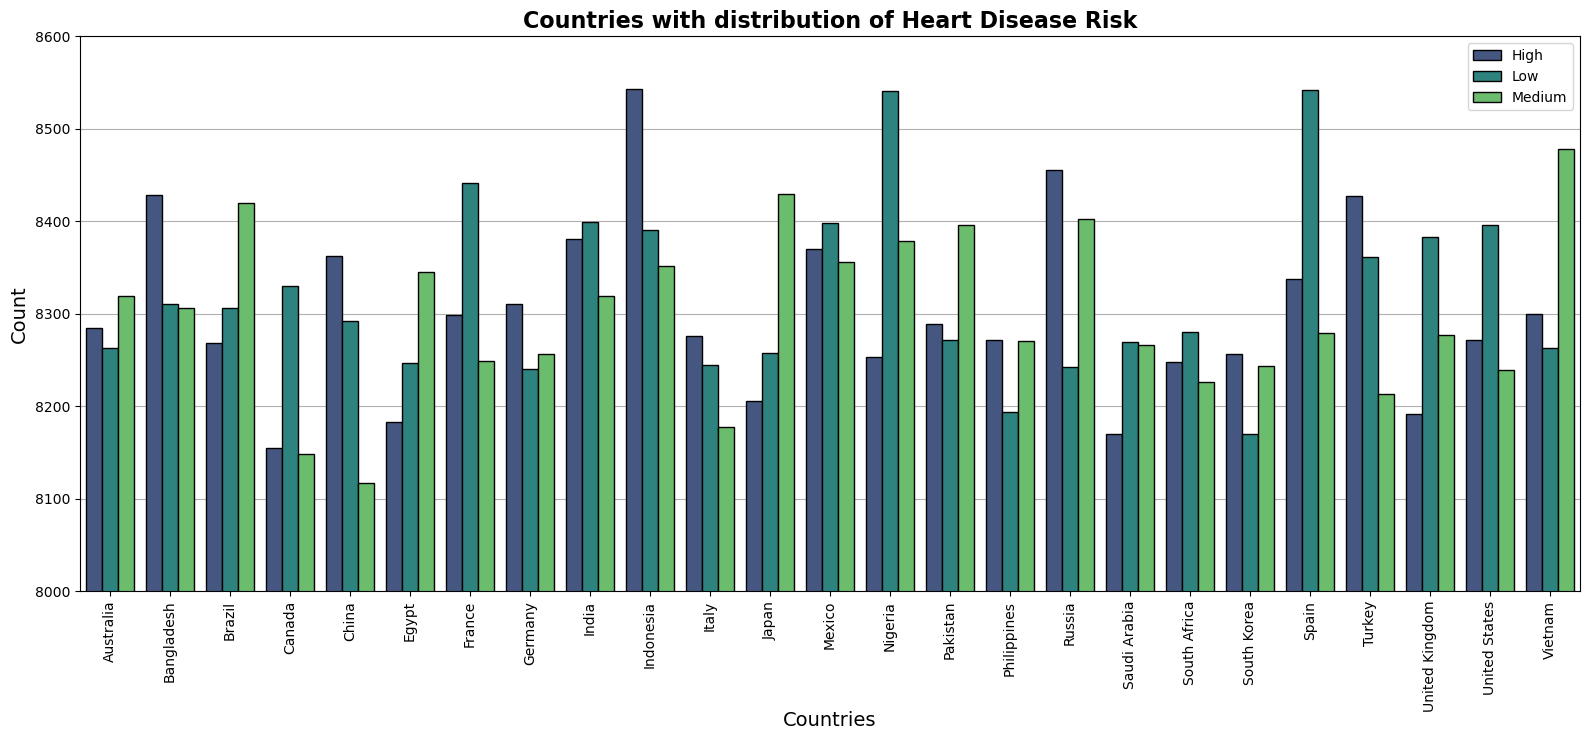

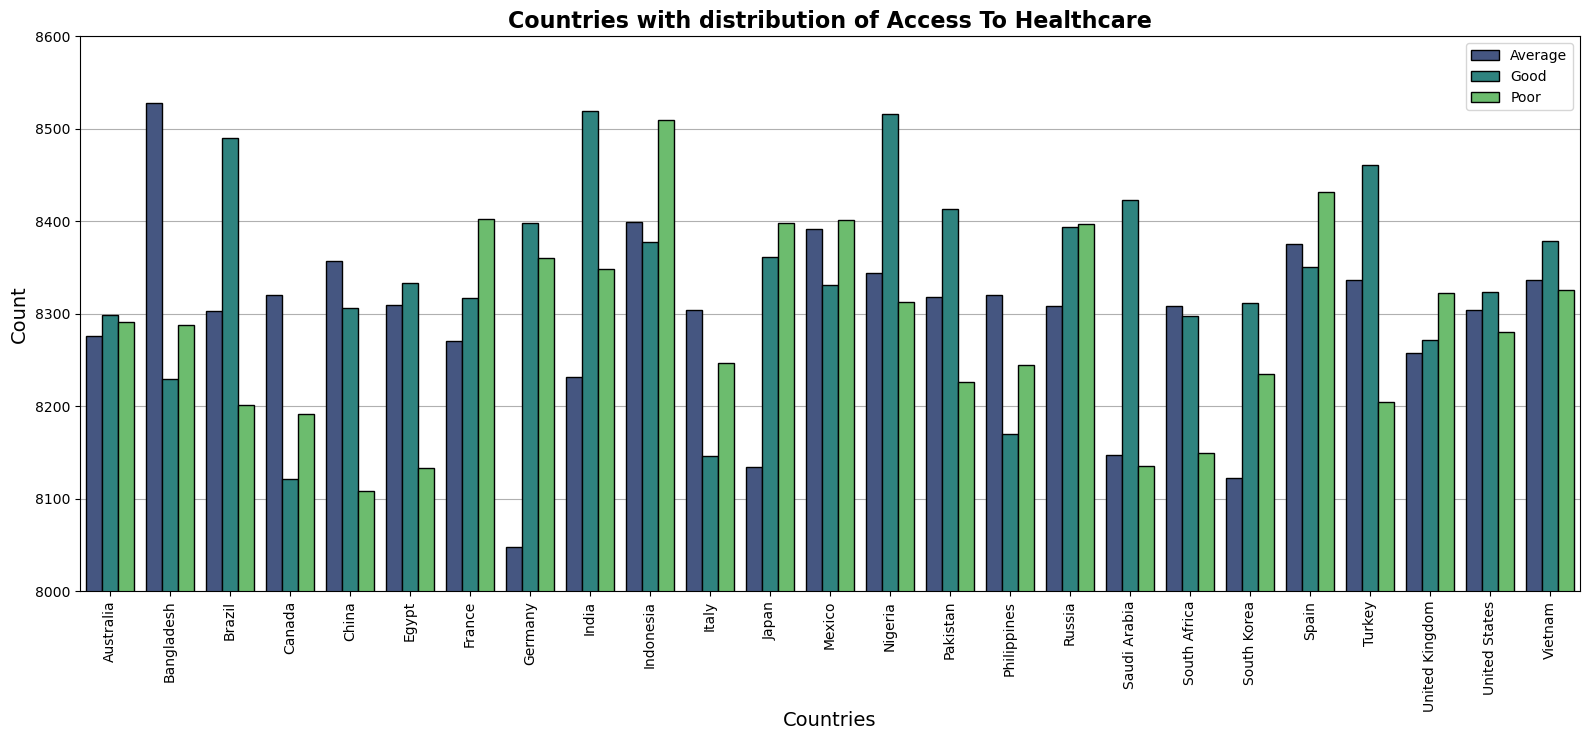

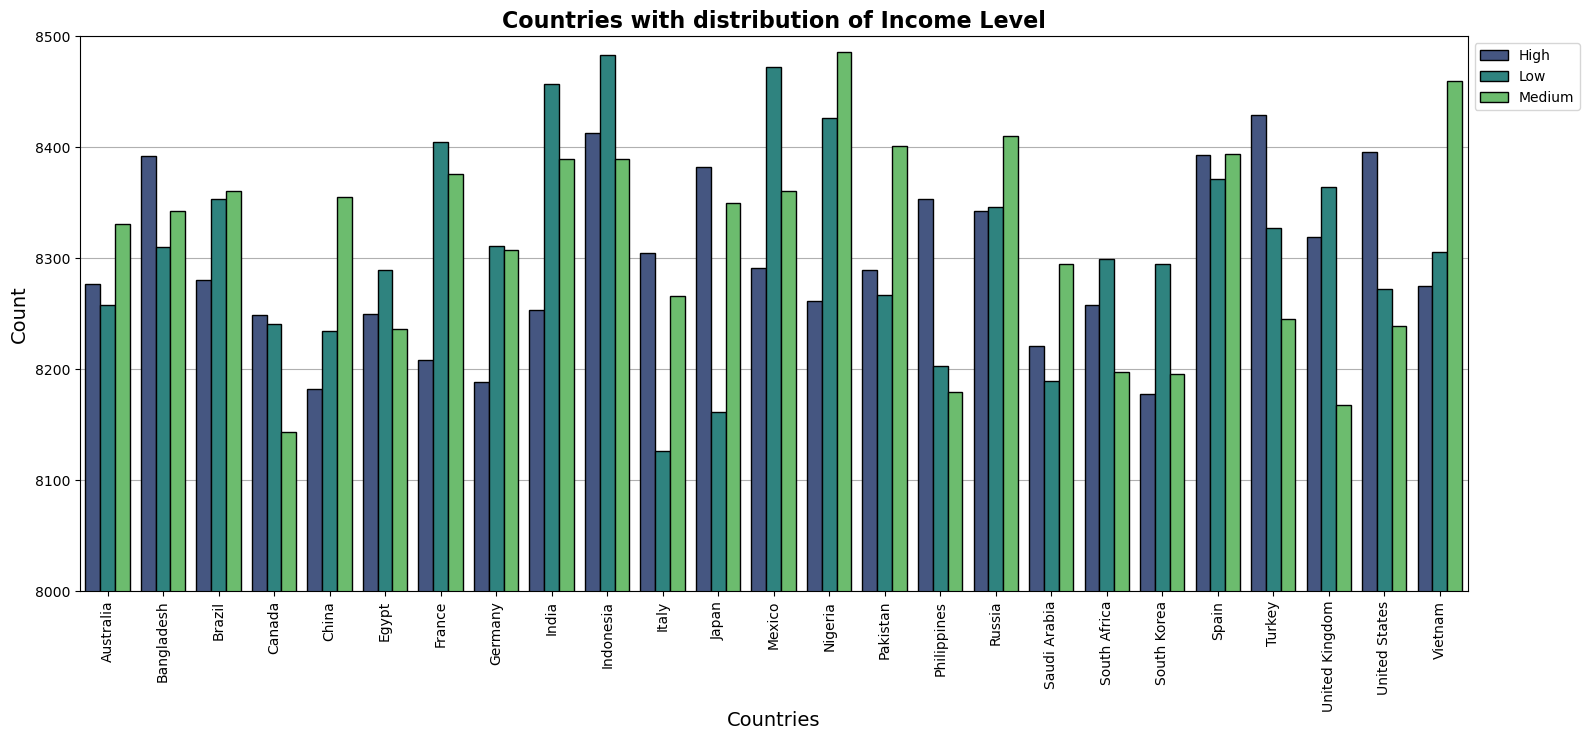

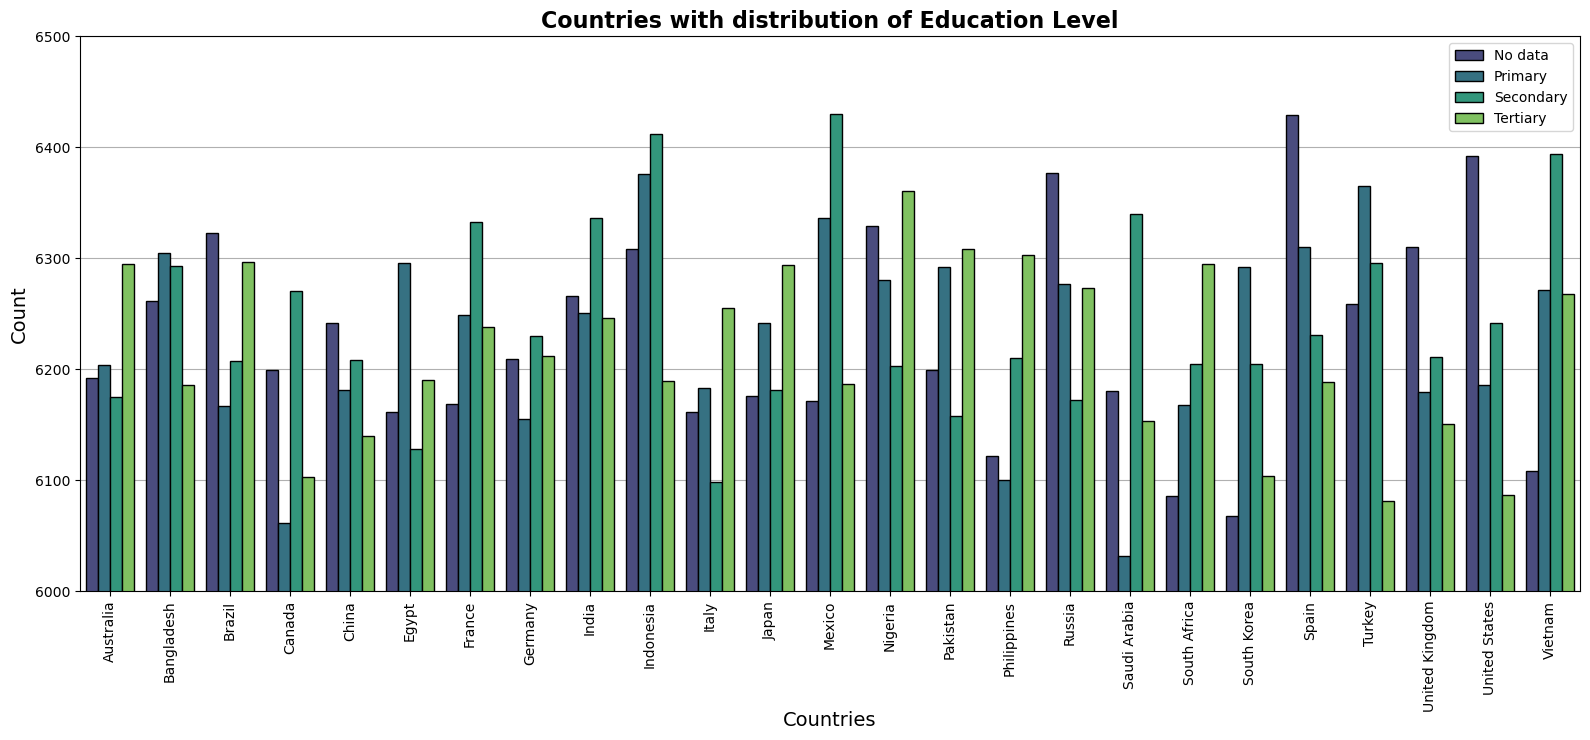

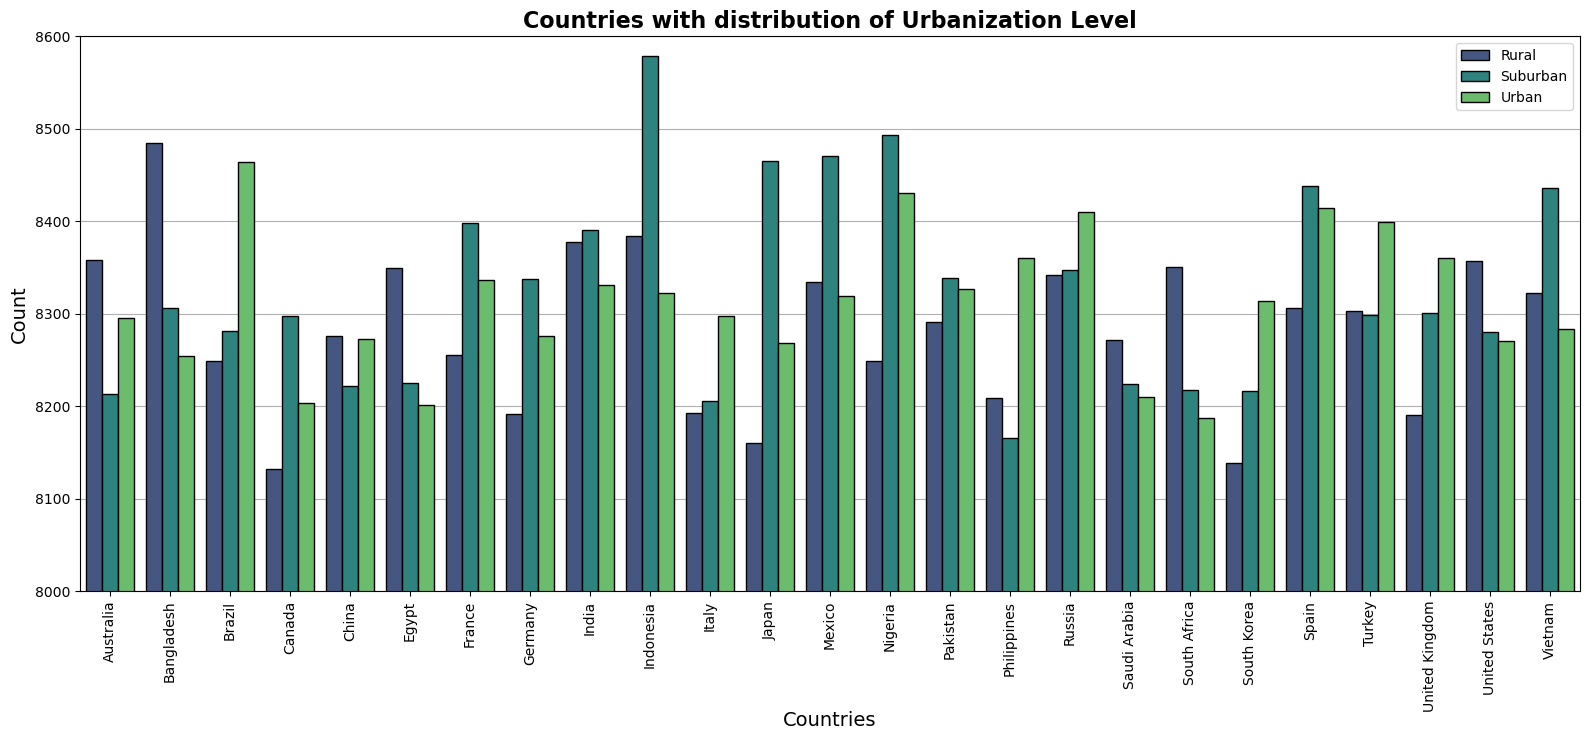

In [91]:
dict = {'heart_attack_outcome' : (12000, 12800), 'income_level' : (8000, 8500), 'education_level' : (6000, 6500), 
        'urbanization_level' : (8000, 8600),'access_to_healthcare' : (8000, 8600), 'heart_disease_risk' : (8000, 8600)}

for col in cols:
    df_level = df.groupby(['country', col]).size().reset_index(name = 'count')

    plt.figure(figsize = (16, 7.5))
    bar = sns.barplot(x = 'country', y = 'count', data = df_level, hue = col, edgecolor = 'black', palette = 'viridis')
    plt.title(f"Countries with distribution of {col.title().replace('_', ' ')}", fontsize = 16, fontweight = 'bold')
    plt.xlabel("Countries", fontsize = 14, labelpad = -1)
    plt.ylabel("Count", fontsize = 14)
    plt.legend(bbox_to_anchor = (1, 1))
    plt.grid(axis = 'y')
    plt.xticks(rotation = 90)
    plt.ylim(dict[col])
    plt.tight_layout()
    bar.set_axisbelow(True)
    plt.show()

# Correlation


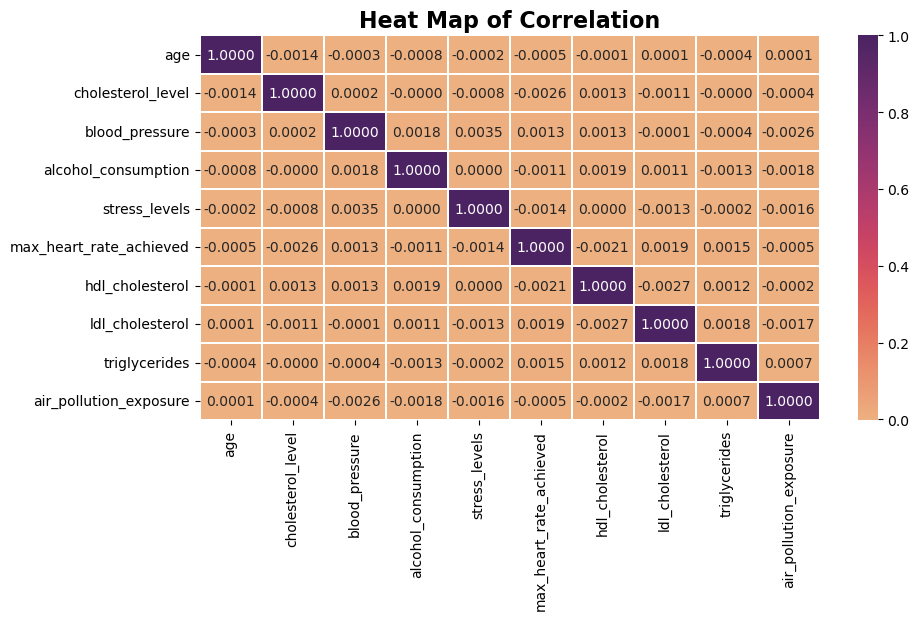

In [92]:
df_corr = df[numeric_col].corr()

plt.figure(figsize = (10, 5))
sns.heatmap(df_corr, cmap = 'flare', annot = True, fmt = '.4f', edgecolor = 'black', linewidth = 1.3)
plt.title("Heat Map of Correlation", fontweight = 'bold', fontsize = 16)
plt.show()